<a href="https://colab.research.google.com/github/Boyraci41/Neural-Network/blob/master/Text_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
embedding_layer = layers.Embedding(1000,5)
result = embedding_layer(tf.constant([1,2,3]))
result

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.04217526, -0.04519738, -0.01501698, -0.0433121 ,  0.00529184],
       [ 0.0309131 ,  0.04433281,  0.02804149, -0.04656086, -0.01303024],
       [ 0.022908  , -0.0129673 , -0.03496184,  0.02884439,  0.00213813]],
      dtype=float32)>

In [4]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ0HKJ8/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ0HKJ8/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ0HKJ8/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [9]:
train_batch = next(iter(train_batches))


(<tf.Tensor: shape=(10, 524), dtype=int64, numpy=
 array([[ 156,   37,   29, ...,    0,    0,    0],
        [  62,    9,    4, ...,    0,    0,    0],
        [7369, 7961, 5033, ...,    0,    0,    0],
        ...,
        [  12,  281,  196, ...,    0,    0,    0],
        [  12,  129,   12, ...,    0,    0,    0],
        [  12,  284,    1, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0])>)

In [13]:
encoder = info.features['text'].encoder

model = keras.Sequential([
                          
layers.Embedding(encoder.vocab_size, 16),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)


])


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.5057 - accuracy: 0.6998 - val_loss: 0.3624 - val_accuracy: 0.8400
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2847 - accuracy: 0.8812 - val_loss: 0.3958 - val_accuracy: 0.8550
Epoch 3/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2313 - accuracy: 0.9090 - val_loss: 0.4486 - val_accuracy: 0.8200
Epoch 4/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1981 - accuracy: 0.9228 - val_loss: 0.3046 - val_accuracy: 0.8850
Epoch 5/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.1757 - accuracy: 0.9350 - val_loss: 0.4597 - val_accuracy: 0.8250
Epoch 6/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.1571 - accuracy: 0.9428 - val_loss: 0.4957 - val_accuracy: 0.8350
Epoch 7/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.1420 - accuracy: 0.9490 - val_loss: 0.3801 - val_ac

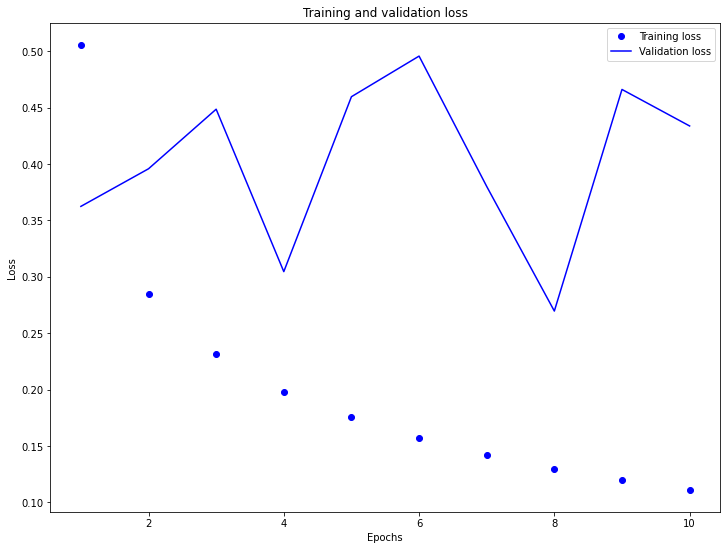

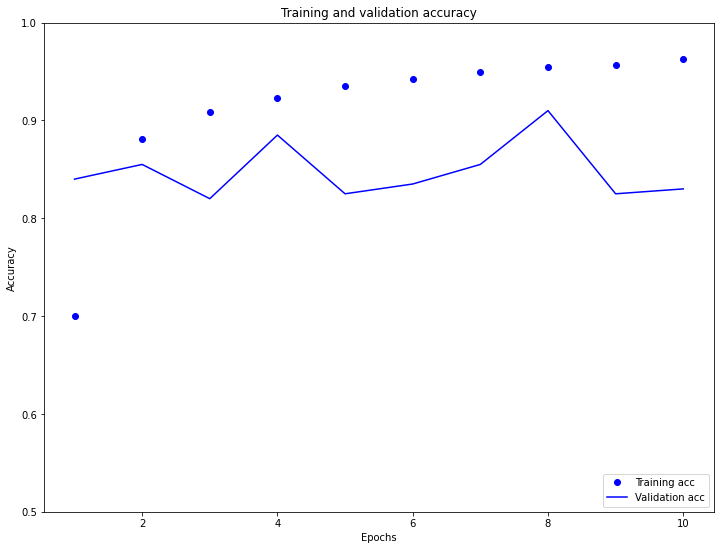

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()